Question 7: Hyperparameter Optimization and Ensemble Methods<br>
Task: Combine GridSearchCV with an ensemble method to tune hyperparameters for boosting on a complex dataset like the Wine dataset.

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 5, 'learning_rate': 0.1}

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.90      0.90      0.90        21
           2       1.00      0.86      0.92        14

    accuracy                           0.91        54
   macro avg       0.92      0.90      0.91        54
weighted avg       0.91      0.91      0.91        54


Confusion Matrix:
[[18  1  0]
 [ 2 19  0]
 [ 1  1 12]]


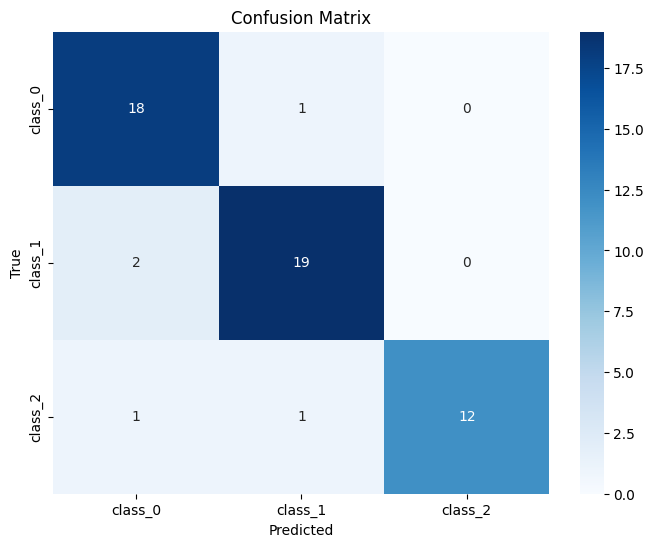

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Step 4: Define a smaller hyperparameters grid for tuning
param_dist = {
    'n_estimators': [50, 100],  # Number of boosting stages
    'learning_rate': [0.01, 0.1],  # Step size
    'max_depth': [3, 5],  # Maximum depth of the trees
    'min_samples_split': [2, 5]  # Minimum samples required to split a node
}

# Step 5: Set up RandomizedSearchCV with 3-fold cross-validation
random_search = RandomizedSearchCV(estimator=gbc, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)

# Step 6: Fit RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train, y_train)

# Step 7: Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Step 8: Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Step 9: Print classification report and confusion matrix
print("Best Hyperparameters:", best_params)
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Step 10: Plot confusion matrix heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
